In [1]:
# -*- coding: utf-8 -*-

import functools
import numpy as np
import sklearn.metrics
import sklearn.datasets
import sklearn.model_selection


import pso
import ann
#activationLayer="tanh"
#np.random.seed(6663)
def dim_weights(shape):
    dim = 0
    for i in range(len(shape)-1):
        dim = dim + (shape[i] + 1) * shape[i+1]
    return dim

def weights_to_vector(weights):
    w = np.asarray([])
    for i in range(len(weights)):
        v = weights[i].flatten()
        w = np.append(w, v)
    return w

def vector_to_weights(vector, shape):
    weights = []
    idx = 0
    for i in range(len(shape)-1):
        r = shape[i+1]
        c = shape[i] + 1
        idx_min = idx
        idx_max = idx + r*c
        W = vector[idx_min:idx_max].reshape(r,c)
        weights.append(W)
    return weights

def eval_neural_network(weights, shape, X, y,activationLayer):
    mse = np.asarray([])
    for w in weights:
        weights = vector_to_weights(w, shape)
        nn = ann.MultiLayerPerceptron(shape, weights=weights)
        y_pred = nn.run(X,activationLayer)
        mse = np.append(mse, sklearn.metrics.mean_squared_error(np.atleast_2d(y), y_pred))
    return mse

def print_best_particle(best_particle):
    print("New best particle found at iteration #{i} with mean squared error: {score}".format(i=best_particle[0], score=best_particle[1]))




#just xy error = 0.22938741634873416
#with sinx sin y error = 0.2325498216710004
#with sin and sq error = 0.21790465807135315

In [2]:

def sine(X):
    return np.sin(X)


#loading Starts here

def sq(X):
    return np.power(X,2)

num_classes = 2
f = open("two_spirals.dat","r")
data = np.loadtxt(f)
X = data[:,0:2]
y = data[:,2]
y = y.astype(int)


def generateData(X,y,sin=False,square=False):
    if sin and square:
        X = np.hstack((X,np.hstack((sq(X),sine(X)))))
      #  print(X[0])
    elif sin:
        X=np.hstack((X,sine(X)))
    elif square:
        X = np.hstack((X,sq(X)))
    train_test_split = int(0.5*len(y))
    X_train,X_test = X[:train_test_split],X[train_test_split:]
    y_train,y_test = y[:train_test_split],y[train_test_split:]  
    return X,X_train,X_test,y_train,y_test

X,X_train,X_test,y_train,y_test=generateData(X,y,True,True)
X[0]
    


array([ 4.47485   , -0.89004   , 20.02428252,  0.7921712 , -0.97192002,
       -0.77709692])

In [3]:

# # Load MNIST digits from sklearn

# num_classes = 10
# mnist = sklearn.datasets.load_digits(num_classes)
# X, X_test, y, y_test = sklearn.model_selection.train_test_split(mnist.data, mnist.target)

num_inputs = X.shape[1]
print("Number of inputs = ",num_inputs)
y_true = np.zeros((len(y), num_classes))

for i in range(len(y)):
    y_true[i, y[i]] = 1

y_test_true = np.zeros((len(y_test), num_classes))
for i in range(len(y_test)):
    y_test_true[i, y_test[i]] = 1


print("y test shap e= ", y_test.shape)
print("y true shape = ",y_true.shape)
print("y test true shape = ",y_test_true.shape)
print(X_test.shape)
print(X_train.shape)

Number of inputs =  6
y test shap e=  (132,)
y true shape =  (264, 2)
y test true shape =  (132, 2)
(132, 6)
(132, 6)


In [25]:
def training(shape,activationLayer):

    # Set up

    # Set up

    #shape = (num_inputs, 8, num_classes)

    cost_func = functools.partial(eval_neural_network, shape=shape, X=X, y=y_true.T,activationLayer=activationLayer)

    swarm = pso.ParticleSwarm(cost_func, num_dimensions=dim_weights(shape), num_particles=30,chi=0.72984 ,phi_p=2.02,phi_g=2.02)
    # Train...
    i = 0
    best_scores = [(i, swarm.best_score)]
    print_best_particle(best_scores[-1])
    while swarm.best_score>1e-6 and i<15000:
        swarm._update()
        i = i+1
        #print("index = ",i)
        if i%5000==0 and swarm.best_score < best_scores[-1][1]:
            best_scores.append((i, swarm.best_score))
            print_best_particle(best_scores[-1])

    # Test...
    best_weights = vector_to_weights(swarm.g, shape)
    best_nn = ann.MultiLayerPerceptron(shape, weights=best_weights)

    y_test_pred = np.round(best_nn.run(X_test,activationLayer))
    print("Mean absolute error score for  =",(activationLayer, sklearn.metrics.mean_squared_error(y_test_true,y_test_pred.T)))
    #print("Accuracy score = ",sklearn.metrics.accuracy_score(y_test_true,y_test_pred.T))
   # print("accuracy score =",sklearn.metrics.accuracy_score(y_test_true, y_test_pred.T))
 #   print(len(y_test_pred.T),len(y_test_true))
    return sklearn.metrics.mean_squared_error(y_test_true,y_test_pred.T)
    # #MES score = 0.30303030303030304
    # Accuracy score =  0.5606060606060606


In [26]:
# shape=(num_inputs,4,num_classes)

# activationLayer="tanh"
# training(shape,activationLayer)
# training(shape,"sigmoid")

In [19]:
def testRun():
    '''
    I want mse to be y axis
    I want neurons to be x axis
    then I will have 3 plots, tanh, sigmoid and relu?
    '''
    #shape = (num_inputs, 8, num_classes)

    activations = ['sigmoid']#,'relu','default']
    neurons = [4,5,6,7,8]
    arrays = np.zeros(shape=(len(activations),len(neurons)))

    for i in range(len(arrays)):
        activationLayer = activations[i]
        for k in range(len(neurons)):
            shape = (num_inputs,neurons[k],num_classes)
            mse = training(shape,activationLayer)
            arrays[i][k]=mse
            print(i,k)
     #   print(i)

    return arrays

sigmoid = testRun()



New best particle found at iteration #0 with mean squared error: 0.35519316485658564
New best particle found at iteration #5000 with mean squared error: 0.15152891306986718
New best particle found at iteration #10000 with mean squared error: 0.1488715335110294
Mean absolute error score for  = ('sigmoid', 0.23106060606060608)
accuracy score = 0.7651515151515151
0 0
New best particle found at iteration #0 with mean squared error: 0.3762208528106808
New best particle found at iteration #5000 with mean squared error: 0.1456817703735641
New best particle found at iteration #10000 with mean squared error: 0.14226232797899413
Mean absolute error score for  = ('sigmoid', 0.20833333333333334)
accuracy score = 0.696969696969697
0 1
New best particle found at iteration #0 with mean squared error: 0.3531381377603966
New best particle found at iteration #5000 with mean squared error: 0.10634861849526708
New best particle found at iteration #10000 with mean squared error: 0.10230207307429665
Mean ab

In [24]:
def testRun():
    '''
    I want mse to be y axis
    I want neurons to be x axis
    then I will have 3 plots, tanh, sigmoid and relu?
    '''
    #shape = (num_inputs, 8, num_classes)

    activations = ['tanh']#,'relu','default']
    neurons = [4,5,6,7,8]
    arrays = np.zeros(shape=(len(activations),len(neurons)))

    for i in range(len(arrays)):
        activationLayer = activations[i]
        for k in range(len(neurons)):
            shape = (num_inputs,neurons[k],num_classes)
            mse = training(shape,activationLayer)
            arrays[i][k]=mse
            print(i,k)
     #   print(i)

    return arrays

tanh = testRun()


New best particle found at iteration #0 with mean squared error: 0.3514193832562762
New best particle found at iteration #5000 with mean squared error: 0.16451183144558845
New best particle found at iteration #10000 with mean squared error: 0.16373300964436982
Mean absolute error score for  = ('tanh', 0.24621212121212122)
accuracy score = 0.7424242424242424
0 0
New best particle found at iteration #0 with mean squared error: 0.38033805374931556
New best particle found at iteration #5000 with mean squared error: 0.11670122020510207
New best particle found at iteration #10000 with mean squared error: 0.11626887232974266
Mean absolute error score for  = ('tanh', 0.17803030303030304)
accuracy score = 0.8181818181818182
0 1
New best particle found at iteration #0 with mean squared error: 0.4463815964963628
New best particle found at iteration #5000 with mean squared error: 0.14293659480592205
New best particle found at iteration #10000 with mean squared error: 0.13918584366265005
Mean absol

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass-multioutput targets

[0.23863636 0.27651515 0.19318182 0.24242424 0.21590909]


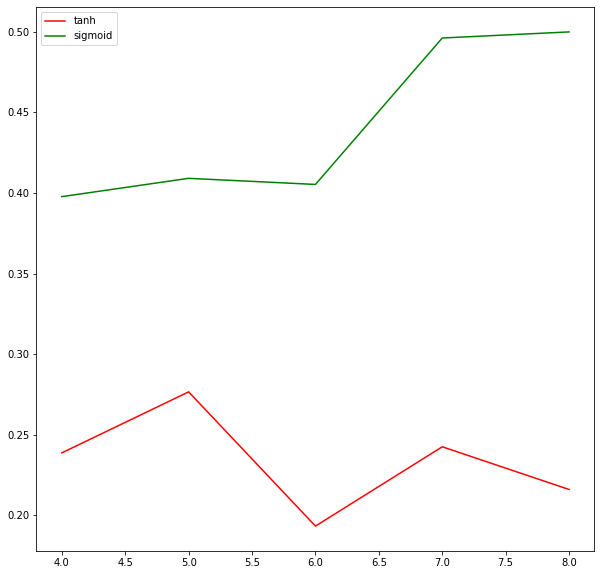

hello


In [ ]:
'''
Using the brute force method figure out the optimal functions

then use the same functions in PSO and compare it with base line

'''

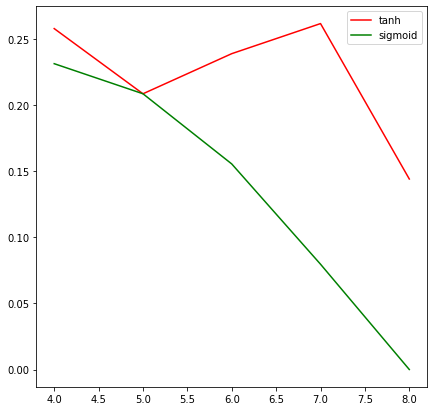

hello


In [23]:
import matplotlib.pyplot as plt

neurons = [4,5,6,7,8]
plt.figure(figsize=(7,7))
plt.plot(neurons,tanh[0],color='r',label="tanh")
plt.plot(neurons,sigmoid[0],color='g',label="sigmoid")
#plt.plot(neurons,arrays[2],color='c',label="relu")
#plt.plot(neurons,arrays[3],color='b',label="Identity")
plt.legend()
plt.show()
print("hello")

In [35]:
np.random.seed(2)


2
